# 9강 분류모델 실습및 CNN 사용하기
## 이번 강의에서 다룰 내용
1. 화합물 데이터를 사용한 분류 모델 실습 : 화합물 데이터를 학습하는 분류 모델을 구현해본다.
2. CNN 구성 요소 파악 : CNN의 구성요소들을 이해하고, 코드로 직접 구현해본다.
3. CNN 모델 적용하기: 분자의 특성 예측 회귀, 분류 예제에 CNN을 적용해본다.

##1.화합물 특성 분류모델 실습

In [1]:
# 분자 데이터를 다루기 위해 rdkit 설치하기
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.7 MB 1.3 MB/s 


### 데이터 준비하기

In [2]:
!wget https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/molnet_publish/bbbp.zip
!ls
!unzip bbbp.zip

--2022-07-11 08:27:17--  https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/molnet_publish/bbbp.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.113.168
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.113.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46174 (45K) [application/zip]
Saving to: ‘bbbp.zip’

bbbp.zip            100%[===================>]  45.09K  --.-KB/s    in 0.02s   

2022-07-11 08:27:18 (2.08 MB/s) - ‘bbbp.zip’ saved [46174/46174]

bbbp.zip  sample_data
Archive:  bbbp.zip
  inflating: BBBP.csv                
  inflating: BBBP_README             


In [3]:
import pandas as pd

data = pd.read_csv('BBBP.csv')
data

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...
...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...


In [4]:
# SMILES 데이터를 사용해서 molecular fingerprint를 만듬
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np

In [5]:
#데이터를 확인해보니 Molobject로 변환되지 않는 데이터가 있었음
idxs=[]
for i, smiles in enumerate(data["smiles"]):
    mol = Chem.MolFromSmiles(smiles)
    if (mol==None):
      print(i,mol)
      idxs.append(i)

59 None
61 None
391 None
614 None
642 None
645 None
646 None
647 None
648 None
649 None
685 None


In [6]:
data=data.drop(idxs, axis=0)

In [7]:
fps = []
for i, smiles in enumerate(data["smiles"]):
    mol = Chem.MolFromSmiles(smiles)
    arr = np.zeros((1,))
    # rdkit의 fingerprint 함수를 사용해서 분자의 특성 수치화
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2048)
    DataStructs.ConvertToNumpyArray(fp, arr)
    
    fps.append(arr)
    
data["fp"] = fps
data

,num,name,p_np,smiles,fp
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


###훈련 데이터, 테스트 데이터 분할하기

In [8]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(data, test_size=0.1, random_state=42)
train, val = train_test_split(train_val, test_size=0.1/0.9, random_state=42)

datasets = {
    "train": train,
    "val":  val,
    "test": test
}

datasets

{'test':        num                      name  p_np  \
 1326  1330                  lisuride     1   
 1008  1010                   atolide     1   
 1078  1080  cetophenicol/cetofenicol     1   
 1791  1795               dextrorphan     1   
 796    798         cefuroxime-axetil     0   
 ...    ...                       ...   ...   
 308    310                methyldopa     0   
 369    371            Streptozotocin     0   
 766    768                  cefdinir     0   
 1294  1298  hydrocortisone-aceponate     1   
 1262  1266                flutroline     1   
 
                                                  smiles  \
 1326  [C@@H]14C(=C[C@H](NC(N(CC)CC)=O)CN1C)C2=CC=CC3...   
 1008        C1=CC=CC(=C1C(NC2=C(C=C(N(CC)CC)C=C2)C)=O)N   
 1078        C1=C(C(O)C(CO)NC(C(Cl)Cl)=O)C=CC(=C1)C(=O)C   
 1791  [C@]134[C@@H]([C@H](CC2=C1C=C(O)C=C2)N(C)CC3)C...   
 796   CO/N=C(C(=O)N[C@H]1[C@H]2SCC(=C(N2C1=O)C(=O)OC...   
 ...                                                 ...   
 308  

### 커스텀 데이터세트 만들기

In [9]:
from torch.utils.data import Dataset

class bbbpDataset(Dataset):
    
    def __init__(self, df):
        self.x = list(df["fp"])
        self.y = list(df["p_np"].values)
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        return torch.tensor(self.x[index]).float(),  torch.tensor(self.y[index]).float()
    
bbbpdata = {
    "train": bbbpDataset(datasets["train"]),
    "val": bbbpDataset(datasets["val"]),
    "test": bbbpDataset(datasets["test"]),
}

bbbpdata

{'test': <__main__.bbbpDataset at 0x7f7d466409d0>,
 'train': <__main__.bbbpDataset at 0x7f7dff5a55d0>,
 'val': <__main__.bbbpDataset at 0x7f7d466298d0>}

In [10]:
import torch
from torch.utils.data import DataLoader

bbbp_dataloaders = {
    "train": DataLoader(bbbpdata["train"], batch_size=32, shuffle=True),
    "val": DataLoader(bbbpdata["val"], batch_size=32, shuffle=False),
    "test": DataLoader(bbbpdata["test"], batch_size=32, shuffle=False)
}

bbbp_dataloaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7f7d465f2a10>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7f7d465f28d0>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7f7d465f2950>}

In [11]:
for data in bbbp_dataloaders["train"]:
    x, y = data
    print(x.shape, y.shape)

torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])
torch.Size([32, 2048]) torch.Size([32])


### 모델 만들기

In [12]:
import torch
from torch import nn

# cpu나 gpu에서 모두 동작하게 만들기
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [13]:
class bbbp_MLP(nn.Module):
    def __init__(self):
        super(bbbp_MLP, self).__init__()
        self.linear1 = nn.Linear(2048, 1024) # 완전 연결된 단순 레이어 만들기 
        self.linear2 = nn.Linear(1024, 256)
        self.output = nn.Linear(256, 1) # 최종 예측을 위해 출력 부 크기 1로 설정 
        self.dropout1 = nn.Dropout(0.5) #일반화를 위한 Dropout
        self.relu = nn.ReLU()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.dropout1(out)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.dropout1(out)
        out = self.relu(out)
        out = self.output(out)
        return out

model = bbbp_MLP()
model.to(device)

bbbp_MLP(
  (linear1): Linear(in_features=2048, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=1, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
)

### 손실 및 최적화 함수 설정

In [15]:
import torch.optim as optim

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss는 sigmoid를 내장하고 있음
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

# 모델 평가를 위한 지표를 만들어 봅시다.

def acc_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() 두개의 텐서가 같은지 평가해줌
    acc = (correct / len(y_pred)) * 100 
    return acc

### 모델 학습하기

In [16]:
torch.manual_seed(42)

# 전체 학습 데이터로 몇번 학습 시킬 것이냐를 결정
epochs = 101 #반복횟수 늘리기

# 손실 값을 저장하기 위한 변수 정의
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0

    for i, data in enumerate(bbbp_dataloaders["train"]):
        x, y = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        outputs = model(x)
        train_loss = loss_fn(outputs, y.view(-1, 1))
        train_acc = acc_fn(torch.round(torch.sigmoid(outputs)), y.view(-1,1))
        train_loss.backward()
        optimizer.step()
        
        epoch_train_loss += train_loss.item()
        
    model.eval()
    epoch_val_loss = 0.0
    with torch.inference_mode():
        for i, data in enumerate(bbbp_dataloaders["test"]):
            x, y = data[0].to(device), data[1].to(device)
                        
            outputs = model(x)
            val_loss = loss_fn(outputs, y.view(-1, 1))
            val_acc = acc_fn(torch.round(torch.sigmoid(outputs)), y.view(-1,1))
            epoch_val_loss += val_loss.item()
            
    epoch_train_loss /= len(bbbp_dataloaders["train"])
    epoch_val_loss /= len(bbbp_dataloaders["test"])
    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    
    if epoch % 10 == 0:
        print("[Epoch %d] Train Loss: %.3f  Train acc : %.3f Validation Loss: %.3f Validation acc : %.3f" %
              (epoch, epoch_train_loss, train_acc, epoch_val_loss, val_acc))

[Epoch 0] Train Loss: 0.579  Train acc : 67.742 Validation Loss: 0.580 Validation acc : 58.333
[Epoch 10] Train Loss: 0.042  Train acc : 100.000 Validation Loss: 0.519 Validation acc : 83.333
[Epoch 20] Train Loss: 0.019  Train acc : 100.000 Validation Loss: 0.630 Validation acc : 91.667
[Epoch 30] Train Loss: 0.015  Train acc : 100.000 Validation Loss: 0.728 Validation acc : 91.667
[Epoch 40] Train Loss: 0.013  Train acc : 100.000 Validation Loss: 0.782 Validation acc : 91.667
[Epoch 50] Train Loss: 0.008  Train acc : 100.000 Validation Loss: 0.828 Validation acc : 91.667
[Epoch 60] Train Loss: 0.007  Train acc : 100.000 Validation Loss: 0.876 Validation acc : 91.667
[Epoch 70] Train Loss: 0.009  Train acc : 100.000 Validation Loss: 0.868 Validation acc : 91.667
[Epoch 80] Train Loss: 0.006  Train acc : 100.000 Validation Loss: 0.923 Validation acc : 91.667
[Epoch 90] Train Loss: 0.007  Train acc : 100.000 Validation Loss: 0.945 Validation acc : 91.667
[Epoch 100] Train Loss: 0.006  T

### 결과 리포팅 하기

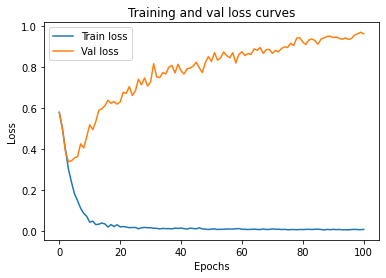

In [17]:
import matplotlib.pyplot as plt

epoch_count = range(epochs)
plt.plot(epoch_count, train_losses, label="Train loss")
plt.plot(epoch_count, val_losses, label="Val loss")
plt.title("Training and val loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

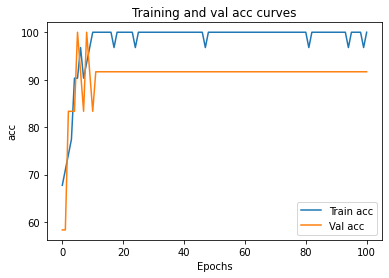

In [18]:
epoch_count = range(epochs)
plt.plot(epoch_count, train_accs, label="Train acc")
plt.plot(epoch_count, val_accs, label="Val acc")
plt.title("Training and val acc curves")
plt.ylabel("acc")
plt.xlabel("Epochs")
plt.legend();

##2. CNN 구성 요소 파악
* 이론 리뷰
합성곱 신경망이 나타나기전에 LinearLayer를 사용했다. 
이미지는 2차원 데이터이고, Linear Layer는 데이터를 1차원으로 입력받기 때문에, 이미지 데이터를 1차원으로 바꿔서 학습해야하는데 데이터를 파악하기 어렵다는 문제가 있다.

![img](https://wikidocs.net/images/page/64066/conv1.png)


![img](https://wikidocs.net/images/page/62306/convpooling.PNG)

### 채널
이미지 데이터를 기준으로 컨볼루션을 설명할것이다. 
그러나, 이미지 데이터를 보면 대부분의 이미지는 색깔이 있다는 것이다.
RGB  => 컬러 이미지에는 3가지 `채널`이 있다는 것을 말함

![img](https://wikidocs.net/images/page/64066/conv3.png)

[28,28,3]


Gray => 컬러를 제거한 이미지를 그레이 이미지라고 하는데, 1 채널만 있다는 것이다.

![img](https://wikidocs.net/images/page/64066/conv2.png)

[28, 28, 1]



### 합성곱 연산(Convolution)
* 합성곱층은 합성곱 연산을 통해서 이미지의 특징을 추출하는 역할을 함
* 합성곱은 영어로 컨볼루션이라고도 불리는데, 커널(kernel) 또는 필터(filter)라는  크기의 행렬로 높이너비 크기의 이미지를 처음부터 끝까지 훑으면서 크기의 겹쳐지는 부분의 각 이미지와 커널의 원소의 값을 곱해서 모두 더한 값을 출력으로 하는 것을 말함
* 이때, 이미지의 가장 왼쪽 위부터 가장 오른쪽까지 순차적으로 훑음
* __커널(kernel)은 일반적으로 3 × 3 또는 5 × 5__를 사용함
*  아래는  크기의 커널로 의 이미지 행렬에 합성곱 연산을 수행하는 과정을 보여줌
* 한 번의 연산을 1 스텝(step)이라고 하였을 때, 합성곱 연산의 네번째 스텝까지 이미지와 식으로 나타내었음
![img](https://wikidocs.net/images/page/64066/conv4.png)

![img](https://wikidocs.net/images/page/64066/conv5.png)

![img](https://wikidocs.net/images/page/64066/conv6.png)

### 특성맵

* 위와 같이 입력으로부터 커널을 사용하여 합성곱 연산을 통해 나온 결과를 특성 맵(feature map)이라고 함
* 위의 예제에서는 커널의 크기가 3 × 3이었지만, 커널의 크기는 사용자가 정할 수 있음
* 또한 커널의 이동 범위가 위의 예제에서는 한 칸이었지만, 이 또한 사용자가 정할 수 있음 이러한 이동 범위를 __스트라이드(stride)__라고 함
* 아래의 예제는 스트라이드가 2일 경우에 5 × 5 이미지에 합성곱 연산을 수행하는 3 × 3 커널의 움직임을 보여줌 최종적으로 2 × 2의 크기의 특성 맵을 얻음
![img](https://wikidocs.net/images/page/64066/conv9.png)

### 패딩(padding)

* 위의 예에서 5 × 5 이미지에 3 × 3의 커널로 합성곱 연산을 하였을 때, 스트라이드가 1일 경우에는 3 × 3의 특성 맵을 얻었음
* 이와 같이 합성곱 연산의 결과로 얻은 특성 맵은 입력보다 크기가 작아진다는 특징이 있음
* 만약, 합성곱 층을 여러개 쌓았다면 최종적으로 얻은 특성 맵은 초기 입력보다 매우 작아진 상태가 되어버림
* 합성곱 연산 이후에도 특성 맵의 크기가 입력의 크기와 동일하게 유지되도록 하고 싶다면 패딩(padding)을 사용하면 됨

![img](https://wikidocs.net/images/page/64066/conv10.png)

* 패딩은 (합성곱 연산을 하기 전에) 입력의 가장자리에 지정된 개수의 폭만큼 행과 열을 추가해주는 것을 말함
* 주로 값을 0으로 채우는 제로 패딩(zero padding)을 사용 
* 그림에는 5 × 5 이미지에 1폭짜리 제로 패딩을 사용하여 위, 아래에 하나의 행을 좌, 우에 하나의 열을 추가한 모습을 보여줌

* 3 × 3 크기의 커널을 사용한다면 1폭짜리 제로 패딩으로, 5 × 5 크기의 커널을 사용한다면 2폭 짜리 제로 패딩으로 입력과 특성 맵의 크기를 보존할 수 있음
* 5 × 5 크기의 이미지에 1폭짜리 제로 패딩을 하면 7 × 7 이미지가 되는데, 여기에 3 × 3의 커널을 사용하여 1 스트라이드로 합성곱을 한 후의 특성 맵은 기존의 입력 이미지의 크기와 같은 5 × 5가 됨

## 특성 맵의 크기 계산 방법

* 입력의 크기와 커널의 크기, 그리고 스트라이드의 값만 알면 합성곱 연산의 결과인 특성 맵의 크기를 계산할 수 있음

* $I_h$: 입력의 높이
*  $I_w$: 입력의 너비
*  $K_h$: 커널의 높이
* $K_w$: 커널의 너비
* $S$: 스트라이드
* $O_h$ : 특성 맵의 높이
* $O_w$ : 특성 맵의 너비
* 특성 맵의 높이와 너비는 아래와 같음
$$O_{h} = floor(\frac{I_{h} - K_{h}}{S}+1)=\\ \frac{(입력의 너비 - 커널 크기)}{스트라이드 크기} + 1$$ 
$$O_{w} = floor(\frac{I_{w} - K_{w}}{S}+1)$$

* 첫번째 예제의 경우 5 × 5 크기의 이미지에 3 × 3 커널을 사용하고 스트라이드 1로 합성곱 연산을 했음 
* 즉 특성 맵의 크기는 (5 - 3 + 1 ) × (5 - 3 + 1) = 3 × 3임

* 패딩의 폭을 라고 하고, 패딩까지 고려한 식은 다음과 같음
$$O_{h} = floor(\frac{I_{h} - K_{h} + 2P}{S}+1)$$
$$O_{w} = floor(\frac{I_{w} - K_{w} + 2P}{S}+1)$$

## 풀링
* 일반적으로 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적
* 풀링 층에서는 특성 맵을 다운샘플링하여 특성 맵의 크기를 줄이는 풀링 연산이 이루어짐
* 풀링 연산에는 일반적으로 최대 풀링(max pooling)과 평균 풀링(average pooling)이 사용됨

![img](https://wikidocs.net/images/page/62306/maxpooling.PNG)

* 풀링 연산에서도 합성곱 연산과 마찬가지로 커널과 스트라이드의 개념을 가짐
* 위의 그림은 스트라이드가 2일 때, 2 x 2 크기 커널로 맥스 풀링 연산을 했을 때 특성맵이 절반의 크기로 다운샘플링되는 것을 보여줌
* 맥스 풀링은 커널과 겹치는 영역 안에서 최대값을 추출하는 방식으로 다운샘플링함

##3. CNN 모델 적용하기
앞선 예제의 데이터를 학습하는 CNN 모델을 생성해 볼 겁니다.
CNN 입력 데이터 모양을 보았듯이 행렬과 채널의 데이터가 모두 있어야 합니다.
따라서 입력 데이터의 모양을 임의로 변경해보도록 하겠습니다.

### 데이터 준비하기
데이터가 기존에는 [N,2048] 모양이었습니다. CNN에서는 컬러가 있는 경우 채널이 3개가 존재한다고 하였는데, 우리의 데이터는 0과1 로만 표시된 그레이 이미지 처럼 고려할 수 있을 것같습니다.
따라서 우리는 [N,1, 64,64] 모양으로 바꿔줄 겁니다. 여기서 64*64가 가능한 이유는 FingerPrint함수가 4096=64의 제곱임을 지원하기 때문에 가능합니다.

In [29]:
import pandas as pd

data = pd.read_csv('BBBP.csv')
data

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...
...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...


In [32]:
#데이터를 확인해보니 Molobject로 변환되지 않는 데이터가 있었음
idxs=[]
for i, smiles in enumerate(data["smiles"]):
    mol = Chem.MolFromSmiles(smiles)
    if (mol==None):
      #print(i,mol)
      idxs.append(i)
data=data.drop(idxs, axis=0)

In [40]:
fps = []
for i, smiles in enumerate(data["smiles"]):
    mol = Chem.MolFromSmiles(smiles)
    arr = np.zeros((1,))
    # rdkit의 fingerprint 함수를 사용해서 분자의 특성 수치화
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, 4096)
    DataStructs.ConvertToNumpyArray(fp, arr)
    
    fps.append(arr)
    
data["fp"] = fps
data

,num,name,p_np,smiles,fp
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### 데이터 최종 변환

In [47]:
X = np.stack(data.fp.values)
X = X.reshape(len(X),1,64,-1)
X.shape, type(X)
data["fps"]=X.tolist()

### 훈련데이터, 테스트 데이터 분할하기

In [48]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(data, test_size=0.1, random_state=42)
train, val = train_test_split(train_val, test_size=0.1/0.9, random_state=42)

datasets = {
    "train": train,
    "val":  val,
    "test": test
}

datasets

{'test':        num                      name  p_np  \
 1326  1330                  lisuride     1   
 1008  1010                   atolide     1   
 1078  1080  cetophenicol/cetofenicol     1   
 1791  1795               dextrorphan     1   
 796    798         cefuroxime-axetil     0   
 ...    ...                       ...   ...   
 308    310                methyldopa     0   
 369    371            Streptozotocin     0   
 766    768                  cefdinir     0   
 1294  1298  hydrocortisone-aceponate     1   
 1262  1266                flutroline     1   
 
                                                  smiles  \
 1326  [C@@H]14C(=C[C@H](NC(N(CC)CC)=O)CN1C)C2=CC=CC3...   
 1008        C1=CC=CC(=C1C(NC2=C(C=C(N(CC)CC)C=C2)C)=O)N   
 1078        C1=C(C(O)C(CO)NC(C(Cl)Cl)=O)C=CC(=C1)C(=O)C   
 1791  [C@]134[C@@H]([C@H](CC2=C1C=C(O)C=C2)N(C)CC3)C...   
 796   CO/N=C(C(=O)N[C@H]1[C@H]2SCC(=C(N2C1=O)C(=O)OC...   
 ...                                                 ...   
 308  

### 커스텀 데이터세트 만들기

In [50]:
from torch.utils.data import Dataset

class bbbpDataset(Dataset):
    
    def __init__(self, df):
        self.x = list(df["fps"])
        self.y = list(df["p_np"].values)
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        return torch.tensor(self.x[index]).float(),  torch.tensor(self.y[index]).float()
    
bbbpdata = {
    "train": bbbpDataset(datasets["train"]),
    "val": bbbpDataset(datasets["val"]),
    "test": bbbpDataset(datasets["test"]),
}

bbbpdata

{'test': <__main__.bbbpDataset at 0x7f7d264db810>,
 'train': <__main__.bbbpDataset at 0x7f7d264b70d0>,
 'val': <__main__.bbbpDataset at 0x7f7d264b7bd0>}

In [51]:
import torch
from torch.utils.data import DataLoader

bbbp_dataloaders = {
    "train": DataLoader(bbbpdata["train"], batch_size=32, shuffle=True),
    "val": DataLoader(bbbpdata["val"], batch_size=32, shuffle=False),
    "test": DataLoader(bbbpdata["test"], batch_size=32, shuffle=False)
}

bbbp_dataloaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7f7d26507690>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7f7d265079d0>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7f7d26507410>}

In [52]:
for data in bbbp_dataloaders["train"]:
    x, y = data
    print(x.shape, y.shape)

torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size([32, 1, 64, 64]) torch.Size([32])
torch.Size

### 모델 만들기

In [53]:
import torch
from torch import nn

# cpu나 gpu에서 모두 동작하게 만들기
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [54]:
class CNN(nn.Module):
    def __init__(self,):
        super(CNN, self).__init__()
        #cnn layer
        # 64* 64 = 3filter padding 1 stride =1 (64-3+2*1+1)/1= 64
        self.conv1 = nn.Conv2d(1,2,kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(2,4,kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(4,8,kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(8,16,kernel_size=3, padding=1)
        #activation function
        self.relu = nn.ReLU()
        #pooling layer
        self.maxpool = nn.MaxPool2d(2)
        #dropout layer
        self.dropout1 = nn.Dropout2d(0.2)
        #fully connect layer
        self.fc1 = nn.Linear(16 * 16 * 16, 1024) 
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 1)
     
    def forward(self, x):# Forward pass: stacking each layer together
        #input Shape (batch_size,1,64,64)
        out = self.conv1(x)
        #convol(batch_size,2,64,64)
        out = self.relu(out)
        out = self.conv2(out)
        #convol(batch_size,4,64,64)
        out = self.relu(out)
        out = self.maxpool(out)
        #pooling (batch_size,4,32,32)
        out = self.dropout1(out)
        out = self.conv3(out)
        #convol(batch_size,8,32,32)
        out = self.relu(out)
        out = self.conv4(out)
        #convol(batch_size,16,32,32)
        out = self.relu(out)
        out = self.maxpool(out)
        #pooling (batch_size,16,16,16) 
        out = self.dropout1(out)
        out = x.view(x.size(0),-1)
        out = self.relu(self.fc1(out))
        out = self.relu(self.fc2(out))
        out = self.fc3(out)
        return out
model = CNN()
model.to(device)

CNN(
  (conv1): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.2, inplace=False)
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=1, bias=True)
)

### 손실 및 최적화 함수 설정

In [55]:
import torch.optim as optim

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss는 sigmoid를 내장하고 있음
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

# 모델 평가를 위한 지표를 만들어 봅시다.

def acc_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() 두개의 텐서가 같은지 평가해줌
    acc = (correct / len(y_pred)) * 100 
    return acc

### 모델 학습하기

In [56]:
torch.manual_seed(42)

# 전체 학습 데이터로 몇번 학습 시킬 것이냐를 결정
epochs = 101 #반복횟수 늘리기

# 손실 값을 저장하기 위한 변수 정의
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0

    for i, data in enumerate(bbbp_dataloaders["train"]):
        x, y = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        outputs = model(x)
        train_loss = loss_fn(outputs, y.view(-1, 1))
        train_acc = acc_fn(torch.round(torch.sigmoid(outputs)), y.view(-1,1))
        train_loss.backward()
        optimizer.step()
        
        epoch_train_loss += train_loss.item()
        
    model.eval()
    epoch_val_loss = 0.0
    with torch.inference_mode():
        for i, data in enumerate(bbbp_dataloaders["test"]):
            x, y = data[0].to(device), data[1].to(device)
                        
            outputs = model(x)
            val_loss = loss_fn(outputs, y.view(-1, 1))
            val_acc = acc_fn(torch.round(torch.sigmoid(outputs)), y.view(-1,1))
            epoch_val_loss += val_loss.item()
            
    epoch_train_loss /= len(bbbp_dataloaders["train"])
    epoch_val_loss /= len(bbbp_dataloaders["test"])
    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    
    if epoch % 10 == 0:
        print("[Epoch %d] Train Loss: %.3f  Train acc : %.3f Validation Loss: %.3f Validation acc : %.3f" %
              (epoch, epoch_train_loss, train_acc, epoch_val_loss, val_acc))

[Epoch 0] Train Loss: 0.578  Train acc : 67.742 Validation Loss: 0.570 Validation acc : 58.333
[Epoch 10] Train Loss: 0.064  Train acc : 96.774 Validation Loss: 0.524 Validation acc : 83.333
[Epoch 20] Train Loss: 0.022  Train acc : 100.000 Validation Loss: 0.502 Validation acc : 100.000
[Epoch 30] Train Loss: 0.015  Train acc : 100.000 Validation Loss: 0.574 Validation acc : 100.000
[Epoch 40] Train Loss: 0.009  Train acc : 100.000 Validation Loss: 0.639 Validation acc : 100.000
[Epoch 50] Train Loss: 0.010  Train acc : 100.000 Validation Loss: 0.645 Validation acc : 100.000
[Epoch 60] Train Loss: 0.008  Train acc : 100.000 Validation Loss: 0.716 Validation acc : 91.667
[Epoch 70] Train Loss: 0.008  Train acc : 96.774 Validation Loss: 0.651 Validation acc : 100.000
[Epoch 80] Train Loss: 0.008  Train acc : 100.000 Validation Loss: 0.736 Validation acc : 100.000
[Epoch 90] Train Loss: 0.008  Train acc : 100.000 Validation Loss: 0.692 Validation acc : 100.000
[Epoch 100] Train Loss: 0.0

### 결과 리포팅 하기

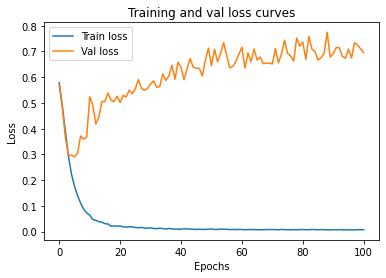

In [57]:
import matplotlib.pyplot as plt

epoch_count = range(epochs)
plt.plot(epoch_count, train_losses, label="Train loss")
plt.plot(epoch_count, val_losses, label="Val loss")
plt.title("Training and val loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

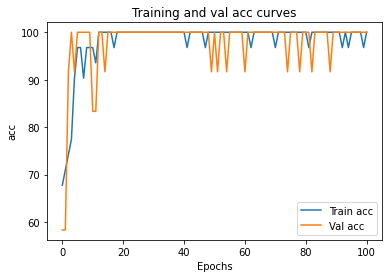

In [58]:
epoch_count = range(epochs)
plt.plot(epoch_count, train_accs, label="Train acc")
plt.plot(epoch_count, val_accs, label="Val acc")
plt.title("Training and val acc curves")
plt.ylabel("acc")
plt.xlabel("Epochs")
plt.legend();